# Анализ продаж компьютерных игр

**Цель проекта**: нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Описание данных**
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


**План исследования**:
* Изучение данных
* Подготовка данных: 
    + привести название столбцов к нижнему регистру
    + обработать пропуски
    + посчитать суммарные продажи и записать в отдельный столбец
* Исследовательский анализ данных:
    + посмотреть сколько игр выпускалось в разные периоды и определить важны ли данные за все периоды
    + посмотреть продажи по платформам
    + определить актуальный период
    + определить оказывают ли влияние отзывы критиков, пользователей на продажи 
    + выделить жанры с высокими и низкими продажами
* Определить самые популярные платформы, жанры в каждом регионе (NA, EU, JP), проверить влияние рейтинга ESRB на продажи.   
* Проверка гипотез:
    + Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
    + Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные
* Выводы


**1 Изучание данных:**

In [1]:
from scipy import stats as st
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn 

In [2]:
data=pd.read_csv('games.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
display(data)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


**2 Подготовка данных:**

Приведем название столбцов к нижнему регистру

In [4]:
data.columns = data.columns.str.lower()
data.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Далее посмотрим на ункальные значения в столбцах critic_score, user_score, rating, а также посмотрим есть ли пропуски в данных.

In [5]:
display(data['critic_score'].unique())
display(data['user_score'].unique())
display(data['rating'].unique())

display(data.isna().sum()) 

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

В столбце user_score  видим обозначение **tbd**, что обозначает to be determined, в переводе: подлежит уточнению. Значит что оценки пока нет.В столбце user_score тип данных object. Поменяем тип данных на числовой с использованием параметра errors='coerce', с помощью которого tbd заменятся на NaN.

**Пропуски в столбце year_of release** составляют (269/16715)*100%=1,6%, что меньше 10%. Поэтому удалим стоки с этими пропусками. Причина пропусков-случайно или намеренно не указали или год выпуска неизвестен. Далее чтобы годы приобрели целочисленный вид, сделаем округление в этом столбце и переведем данные в тип int.

**Пропуски в колонках name, genre** незначительно малы и ни на что не влияют, также их нельзя чем либо заменить, если не знать имени. Скорее всего имя не было указано случайно. Удалим строки с этими пропусками тк от составляют менее 10%, а именно (2/16715)*100%=0,01%

**Пропуски с оценками критиков и пользователей** не будем заполнять, игра может не иметь какой-либо оценки. Также эти два параметра оценки никак не связаны, поэтому нельзя заполнить одни данные на основе других. Удалять какие-либо данные тоже не будем чтобы не потерять данные. 

**Пропуски в рейтинге** заменим на 'unrated', тк рейтинг ESRB присваивается  играм в США и Канаде, то в регионах Европа и Япония рейтинг не заполняется.


In [6]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce') 
data = data.dropna(subset=['name', 'genre', 'year_of_release']) 
data['year_of_release'] =np.round(data['year_of_release'])
data['year_of_release'] = data['year_of_release'].astype('int')
data['rating']=data['rating'].fillna('unrated')

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unrated
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unrated


Проверим наличие полных дубликатов:

In [7]:
display(data.duplicated().sum()) 

0

Полных дубликатов в данных нет.

Далее добавим колонку с общими продажами:

In [8]:
data['total_sales']=data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
data.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unrated,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unrated,31.38


**3 Исследовательский анализ данных**:

Для начала исследованя нам нужно определить актуальный период, для этого сначала посмотрим сколько игр выпускалось в разные годы

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: platform, dtype: int64

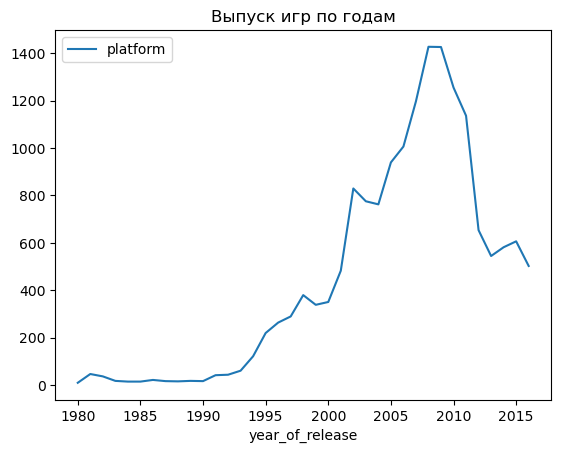

In [9]:
info_years= data.groupby('year_of_release')['platform'].count()
display(info_years)
info_years.plot(x='year_of_release', y='platform', title='Выпуск игр по годам', legend=True);

Не во все годы выпускалось много игр, большое количество игр выпустилось начиная с 2006 года. Скорее всего не все данные по годам нужны для прогноза на 2017 год. Чтобы определить актуальный период, далее выделим платформы с максимальными продажами и рассмотрим за какой период появляются и исчезают эти платформы

In [10]:
info_platform=data.groupby('platform')['total_sales'].sum()
display(info_platform.sort_values(ascending=False))

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

Таким образом далее рассмотрим платформы с максимальными продажами: PS2, X360, PS3, Wii, DS PS:

In [11]:
platform_max_sales=data.query('platform in ["PS2", "X360", "PS3", "Wii", "DS", "PS"]')
platform_pivot=platform_max_sales.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
display(platform_pivot)

platform,DS,PS,PS2,PS3,Wii,X360
year_of_release,,,,,,
1985,0.02,NaN,NaN,NaN,NaN,NaN
1994,NaN,6.03,NaN,NaN,NaN,NaN
1995,NaN,35.96,NaN,NaN,NaN,NaN
1996,NaN,94.70,NaN,NaN,NaN,NaN
1997,NaN,136.17,NaN,NaN,NaN,NaN
1998,NaN,169.49,NaN,NaN,NaN,NaN
1999,NaN,144.53,NaN,NaN,NaN,NaN
2000,NaN,96.37,39.17,NaN,NaN,NaN
2001,NaN,35.59,166.43,NaN,NaN,NaN


Новые платформы появляются и исчезают в течение примерно 10 лет

За актуальный период возьмем период 4года с 2013 по 2016 годы:

In [12]:
data_actual=data[data['year_of_release']<=2016]
data_actual=data[data['year_of_release']>=2013]
data_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unrated,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unrated,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


Выделим платформы с наибольшими продажами:

In [13]:
platform_actual_grouped=data_actual.groupby('platform')['total_sales'].sum()
display(platform_actual_grouped.sort_values(ascending=False))

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: total_sales, dtype: float64

Далее  рассмотрим 5 платформ с наибольшими продажами PS4, XOne, PS3, X360, 3DS:

platform,3DS,PS3,PS4,X360,XOne
year_of_release,,,,,
2013,56.57,113.25,25.99,88.58,18.96
2014,43.76,47.76,100.00,34.74,54.07
2015,27.78,16.82,118.90,11.96,60.14
2016,15.14,3.60,69.25,1.52,26.15


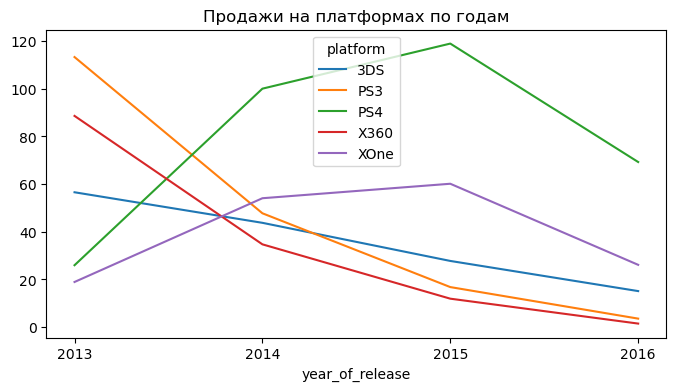

In [14]:
platform_max_sales_actual_period=data_actual.query('platform in ["PS4", "XOne", "PS3", "X360", "3DS"]')
platform_max_sales_actual_period_pivot=platform_max_sales_actual_period.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
display(platform_max_sales_actual_period_pivot)

platform_max_sales_actual_period_pivot.plot(title='Продажи на платформах по годам', legend=True, figsize=(8,4)).set(xticks=[2013, 2014, 2015, 2016]);

За рассматриваемый период 4 года динамику к росту продемонстрировали платформы PS4 и XOne, у них максимальные продажи были в 2015 году

Рассмотрим все платформы по годам:

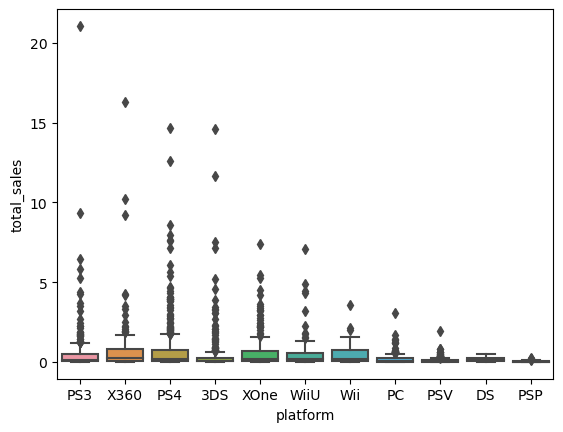

In [15]:
seaborn.boxplot(data = data_actual, x='platform', y='total_sales');


(0.0, 1.0)

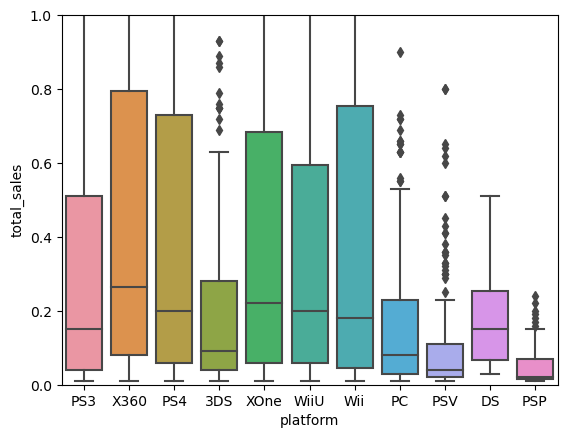

In [16]:
seaborn.boxplot(data = data_actual, x='platform', y='total_sales');
plt.ylim(0, 1)


По диаграмме размаха можем видеть максимальные медиану у платформы X360
Рассмотрим влияние отзывов пользователей и критиков на продажи с платформы X360.

0.35034454602286647
-0.011742185147181347


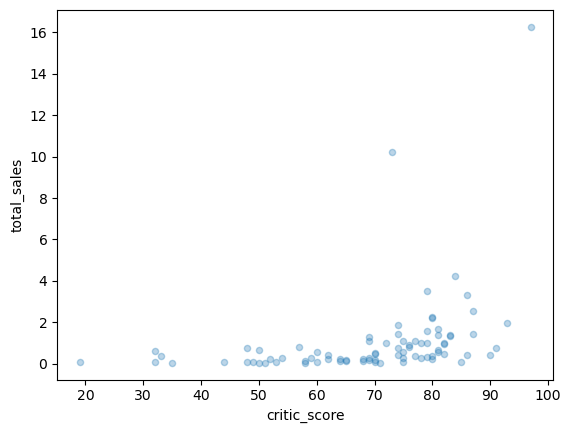

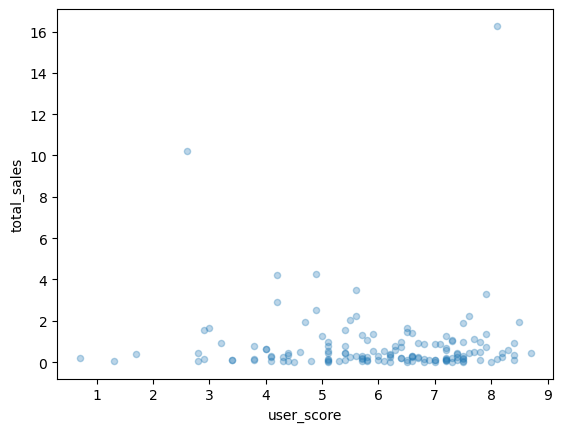

In [17]:
data_x360=data_actual.query('platform in ["X360"]')
data_x360.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3);
data_x360.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3);
print(data_x360['critic_score'].corr(data_x360['total_sales']))
print(data_x360['user_score'].corr(data_x360['total_sales']))


По диаграмме рассеяния и по коэффициенту Пирсона видим, что оценки критиков и пользователей не влияют на продажи

Рассмотрим еще 4 платформ с высокой медианой PS4, XOne, WiiU, Wii и оценим влияют ли отзывы пользователей и критиков на продажи:

0.4065679020617814
-0.03195711020455646
0.4169983280084015
-0.06892505328279418
0.3764149065423913
0.41933048192661854
nan
0.6829417215362369


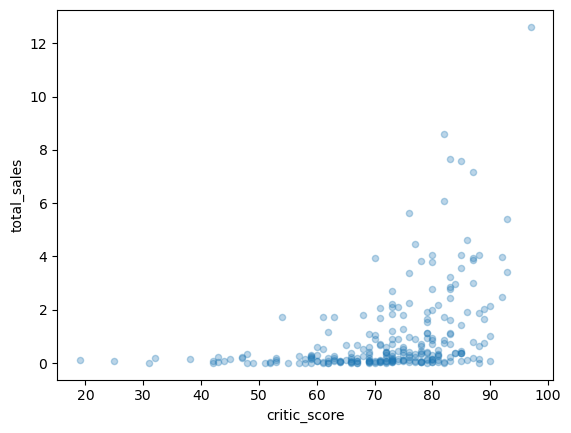

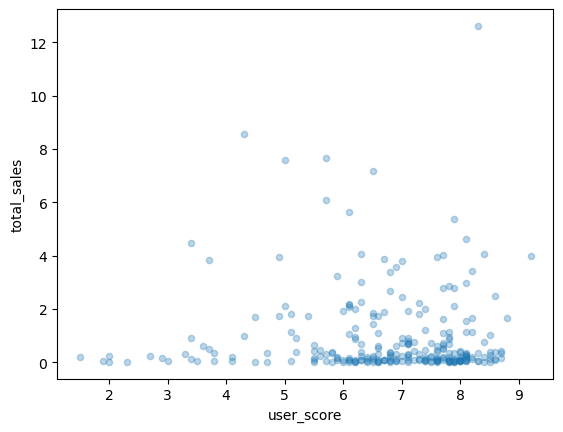

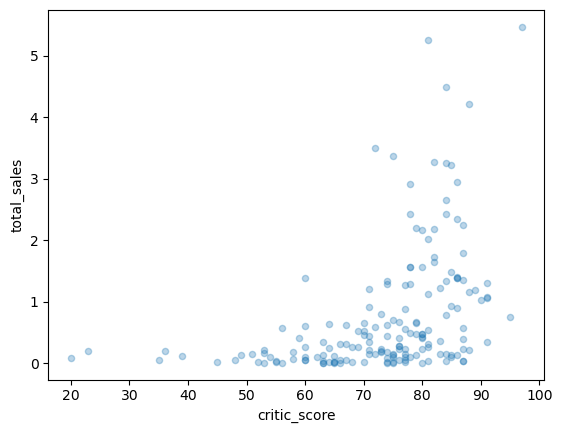

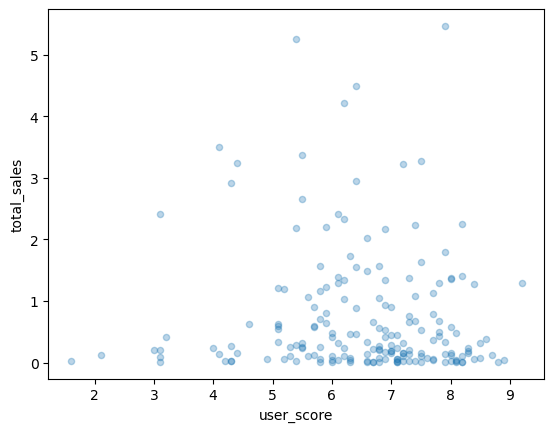

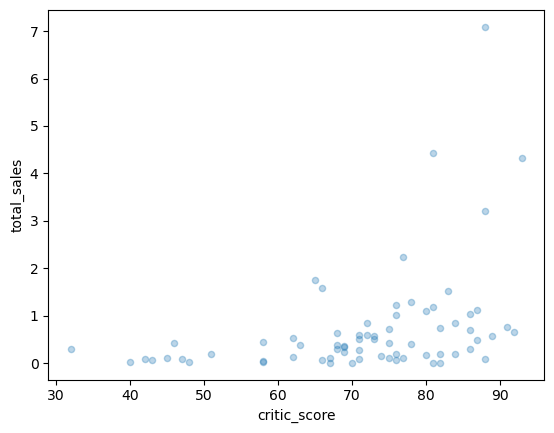

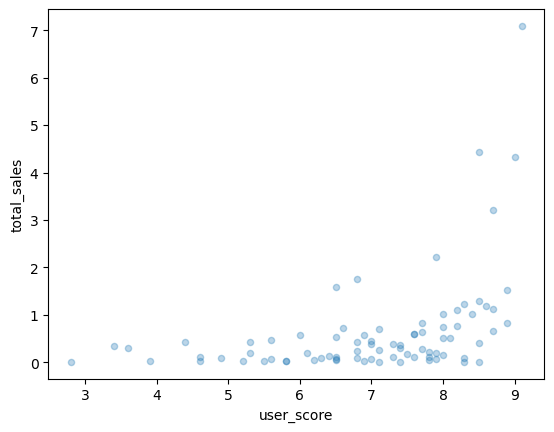

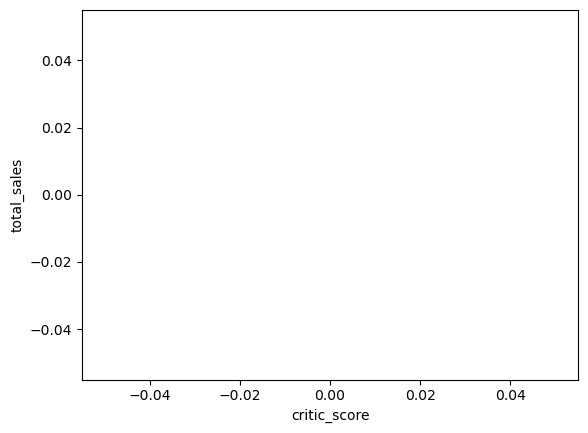

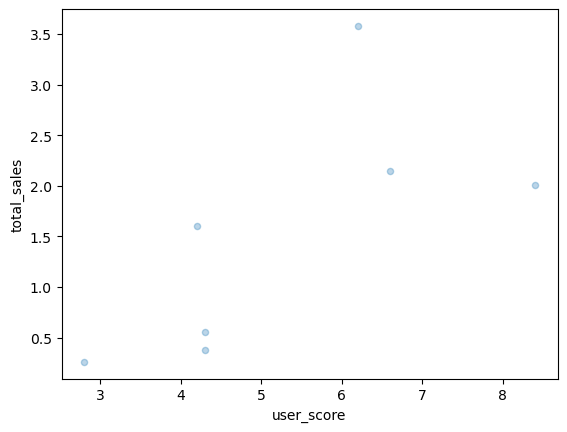

In [18]:
top_four_platforms=['PS4', 'XOne', 'WiiU', 'Wii']

for element in top_four_platforms:
    data_platform = data_actual.query('platform == @element')
    data_platform.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3);
    data_platform.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3);
    print(data_platform['critic_score'].corr(data_actual['total_sales']))
    print(data_platform['user_score'].corr(data_actual['total_sales']))



Если брать еще 4 платформ, то видим тот же результат, что оценки критиков и пользователей не влияют на продажи

Далее посмотрим самые прибыльные и неприбыльные жанры:

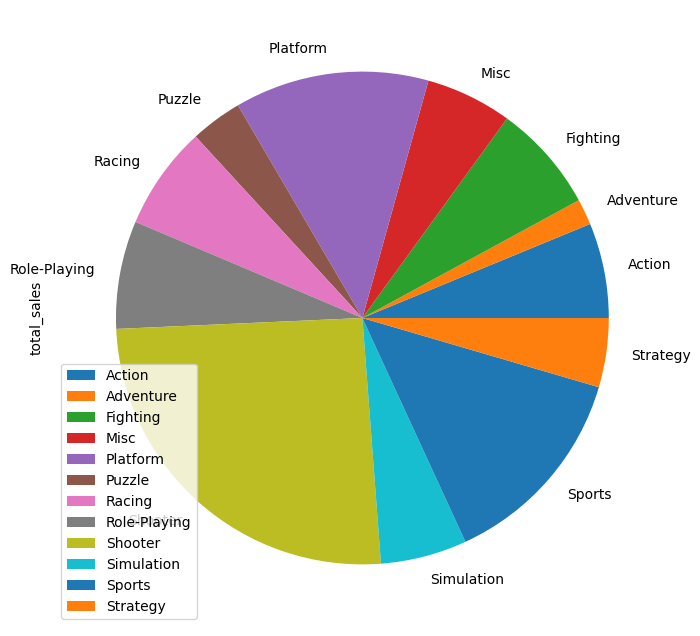

In [19]:
data_actual.pivot_table(index='genre', values='total_sales', aggfunc='median').plot(kind='pie', subplots=True, figsize=(8,8));

Самыми прибыльными являются жанры Shooter,  Platform, Sports самыми неприбыльными: Adventure, Puzzle

**4 Регионы (NA, EU, JP)**

Рассмотрим регионы NA, EU, JP в отдельности, выделим наиболее популярные платформы и жанры, а также рейтинги с высокими продажами. 

platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
WiiU     29.21
PC       11.11
Wii       6.56
PSV       5.04
DS        0.57
PSP       0.00
Name: na_sales, dtype: float64

genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Platform         18.14
Fighting         15.55
Racing           12.96
Adventure         7.14
Simulation        4.86
Strategy          3.28
Puzzle            0.83
Name: na_sales, dtype: float64

rating
M          165.21
unrated     89.42
E           79.05
E10+        54.24
T           49.79
Name: na_sales, dtype: float64

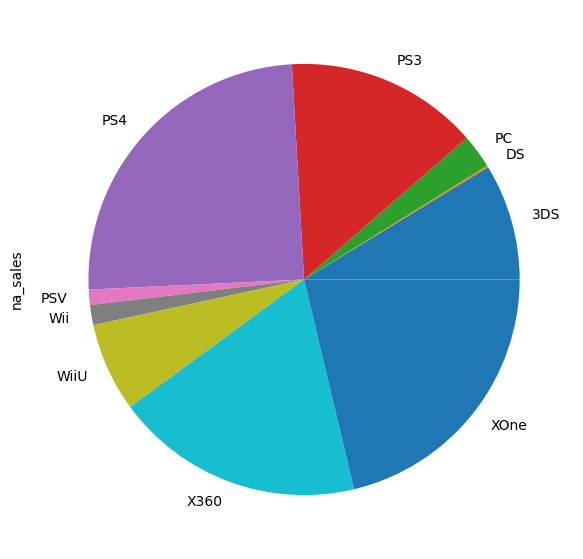

In [20]:
platforms_na=data_actual.groupby('platform')['na_sales'].sum()
genre_na=data_actual.groupby('genre')['na_sales'].sum()
rating_na=data_actual.groupby('rating')['na_sales'].sum()

display(platforms_na.sort_values(ascending=False))
display(genre_na.sort_values(ascending=False))
display(rating_na.sort_values(ascending=False))

platforms_na.plot(kind='pie', subplots=True, figsize=(7,7));

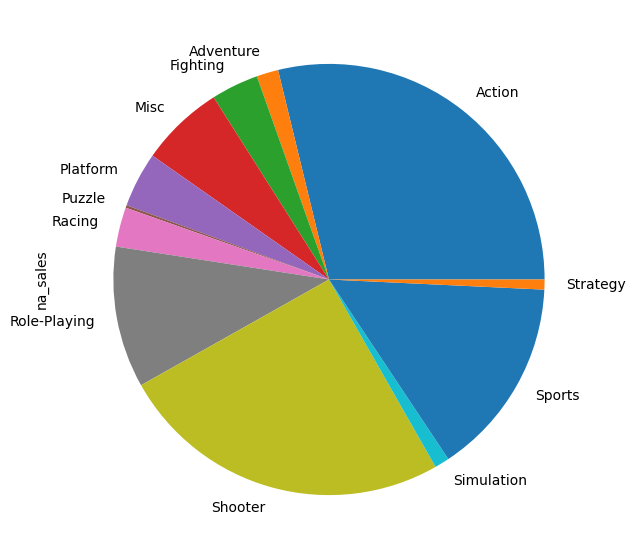

In [21]:
genre_na.plot(kind='pie', subplots=True, figsize=(7,7));

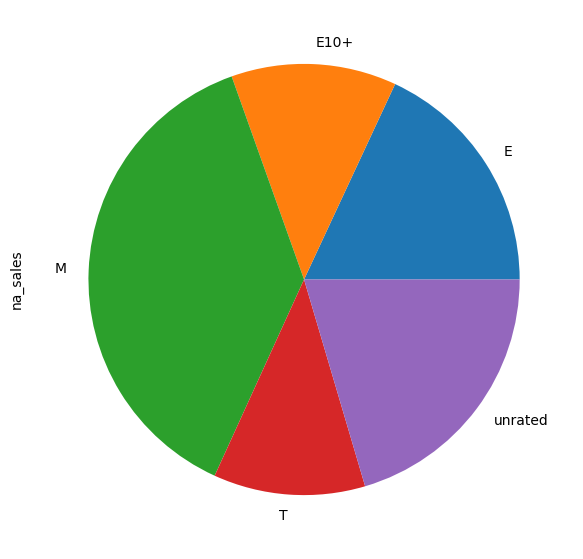

In [22]:
rating_na.plot(kind='pie', subplots=True, figsize=(7,7));

В регионе Северной Америки 5 платформ с наибольшими продажами: PS4, XOne, X360, PS3, 3DS, пять наиболее продаваемых жанров: Action, Shooter, Role-Playing, Misc, Platform. Таким образом, самыми продаваемыми играми в Северной Америке будут игры в жанре Action на платформе PS4. 
Фильмы с рейтингом M имеют самые высокие продажи в регионе Северная Америка

platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
PC       25.36
WiiU     19.85
PSV       6.10
Wii       5.93
DS        0.85
PSP       0.17
Name: eu_sales, dtype: float64

genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Misc             20.04
Platform         15.58
Simulation       10.92
Fighting          8.55
Adventure         8.25
Strategy          4.22
Puzzle            1.00
Name: eu_sales, dtype: float64

rating
M          145.32
E           83.36
unrated     78.91
E10+        42.69
T           41.95
Name: eu_sales, dtype: float64

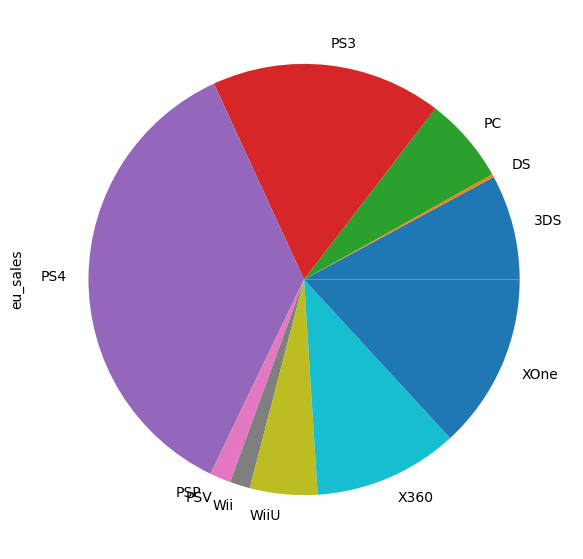

In [23]:
platforms_eu=data_actual.groupby('platform')['eu_sales'].sum()
genre_eu=data_actual.groupby('genre')['eu_sales'].sum()
rating_eu=data_actual.groupby('rating')['eu_sales'].sum()

display(platforms_eu.sort_values(ascending=False))
display(genre_eu.sort_values(ascending=False))
display(rating_eu.sort_values(ascending=False))


platforms_eu.plot(kind='pie', subplots=True, figsize=(7,7));


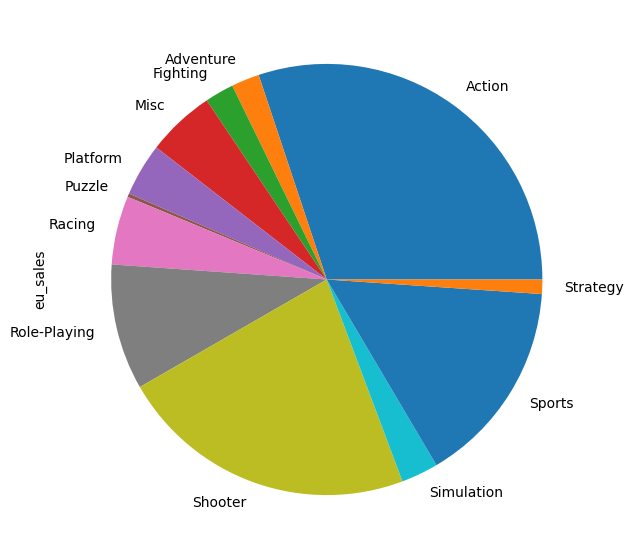

In [24]:
genre_eu.plot(kind='pie', subplots=True, figsize=(7,7));

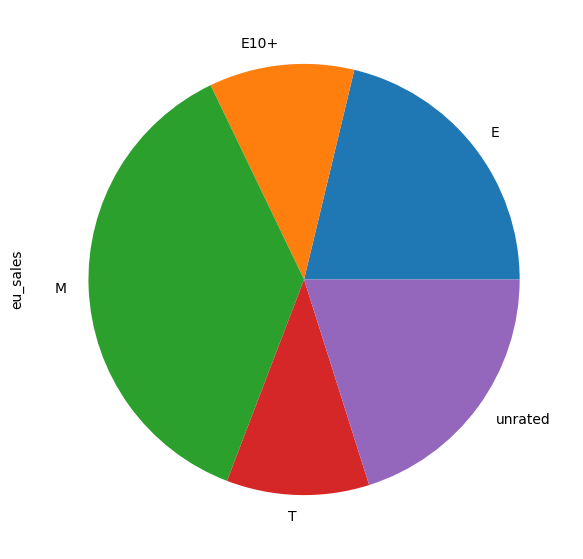

In [25]:
rating_eu.plot(kind='pie', subplots=True, figsize=(7,7));

В регионе Европа 5 платформ с наибольшими продажами: PS4, PS3, XOne, X360, 3DS пять наиболее продаваемых жанров: Action, Shooter, Sports,  Role-Playing, Racing. Таким образом, самыми продаваемыми играми в Европе будут игры в жанре Action на платформе PS4. Фильмы с рейтингом М имеют самые высокие продажи в регионе Европа. Это может объясняться тем, что в Европе покупают американские игры и на них есть очень большой спрос.

platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
PSP      3.29
X360     0.51
XOne     0.34
Wii      0.05
DS       0.00
PC       0.00
Name: jp_sales, dtype: float64

genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Adventure        5.82
Sports           5.41
Platform         4.79
Simulation       4.52
Racing           2.30
Strategy         1.77
Puzzle           1.18
Name: jp_sales, dtype: float64

rating
unrated    85.05
T          20.59
E          15.14
M          14.11
E10+        5.89
Name: jp_sales, dtype: float64

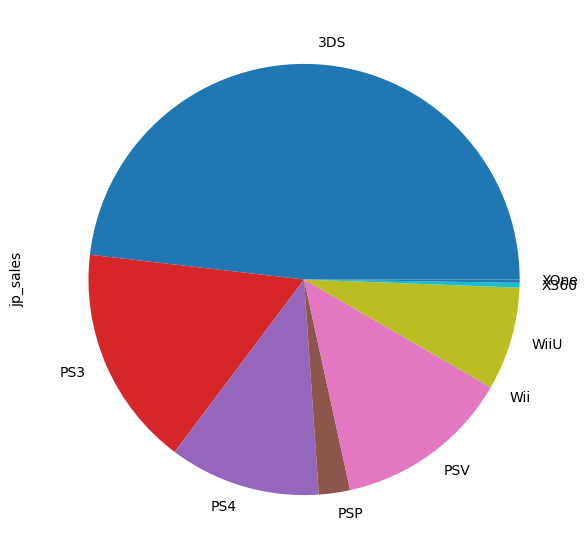

In [26]:
platforms_jp=data_actual.groupby('platform')['jp_sales'].sum()
genre_jp=data_actual.groupby('genre')['jp_sales'].sum()
rating_jp=data_actual.groupby('rating')['jp_sales'].sum()

display(platforms_jp.sort_values(ascending=False))
display(genre_jp.sort_values(ascending=False))
display(rating_jp.sort_values(ascending=False))

platforms_jp.plot(kind='pie', subplots=True, figsize=(7,7));



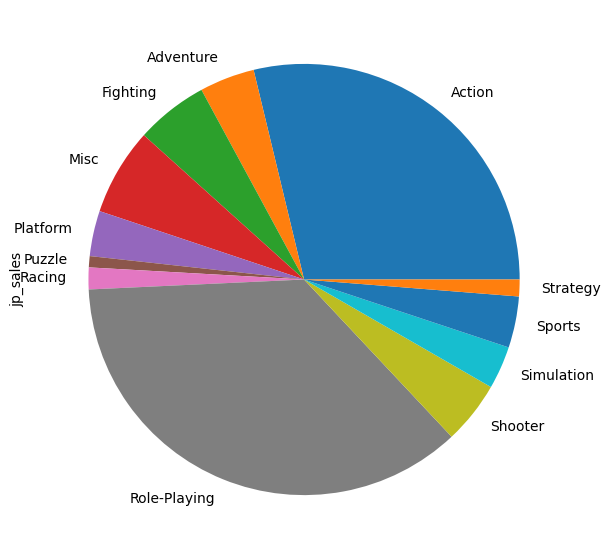

In [27]:
genre_jp.plot(kind='pie', subplots=True, figsize=(7,7));

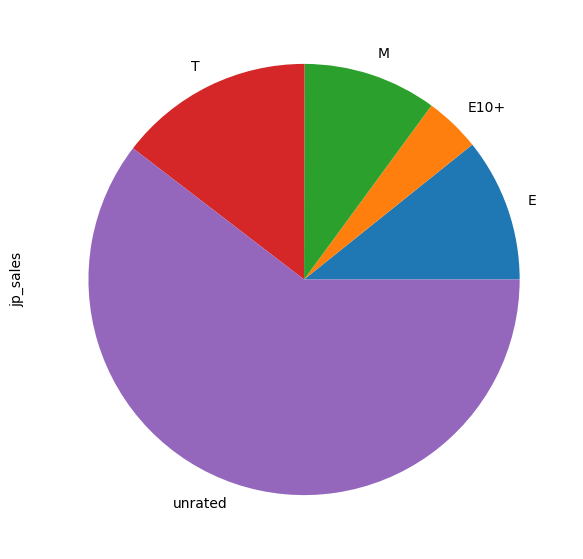

In [28]:
rating_jp.plot(kind='pie', subplots=True, figsize=(7,7));

В регионе Япония 5 платформ с наибольшими продажами:  3DS, PS3, PSV, PS4, WiiU, пять наиболее продаваемых жанров: Role-Playing, Action, Misc, Fighting, Shooter. Таким образом, самыми продаваемыми играми в Японии будут игры в жанре Role-Playing на платформе 3DS. Фильмы с рейтингом unratred имеют самые высокие продажи в регионе Япония, в Японии свой рейтинг, по которому у нас нет данных. Значит в Японии американские игры не пользуются самым большим спросом.


**5 Проверка гипотез**

Проверим несколько гипотез о равенстве среднего двух генеральных совокупностей по взятым из них выборкам с помощью метода scipy.stats.ttest_ind, возьмем alpha = .01

* H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
* H1: Средние пользовательские рейтинги платформ Xbox One и PC разные

In [29]:
data_xbox_one=data_actual.query('platform in ["XOne"]')
data_xbox_one=data_xbox_one.dropna(subset=['user_score'])
sample_1=data_xbox_one['user_score']
data_pc=data_actual.query('platform in ["PC"]and user_score>=0')
data_pc=data_pc.dropna(subset=['user_score'])
sample_2=data_pc['user_score']
alpha = .01
results = st.ttest_ind(
    sample_1, 
    sample_2)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 



p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


* H0: Средние пользовательские рейтинги жанров Action и Sports  одинаковые 
* H1: Средние пользовательские рейтинги жанров Action и Sports разные

In [30]:
data_action=data_actual.query('genre in ["Action"]')
data_action=data_action.dropna(subset=['user_score'])
sample_1=data_action['user_score']
data_sports=data_actual.query('genre in ["Sports"]')
data_sports=data_sports.dropna(subset=['user_score'])
sample_2=data_sports['user_score']
alpha = .01
results = st.ttest_ind(
    sample_1, 
    sample_2)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 



p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


Таким образом, можем сказать, что средние пользовательские рейтинги жанров Action и Sports разные

**6 Выводы**:
* Оценки критиков и пользователей не влияют на продажи
* В целом самыми прибыльными являются жанры Shooter, Platform, Sports самыми неприбыльными: Adventure, Puzzle
* Самыми продаваемыми играми в Северной Америке будут игры в жанре Action на платформе PS4, в Европе игры в жанре Action на платформе PS4, в Японии-игры в жанре Role-Playing на платформе 3DS 
* Рейтинг М имеет самые высокие продажи в Северной Америке и Европе, в Японии самые высокие продажи у игр без рейтинга, то есть  не американские.
* Средние пользовательские рейтинги жанров Action и Sports разные

